In [268]:
import calliope
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import winsound as ws

In [269]:
hydrogen_subsidy = -1*np.arange(0,0.31,0.01) #range of hydrogen subsidy, to test the cost competitiveness of Green hydrogen production method
hydrogen_cost = -0.044
electricity_price = "reference"
time_period = "default"

scenarios = {"reference":{"default":{"cs1":"default/ref_price_elec/concept_scenario_1","cs2":"default/ref_price_elec/concept_scenario_2","cs3":"default/ref_price_elec/concept_scenario_3","cs4":"default/ref_price_elec/concept_scenario_4"},
             "high_wind_month":{"cs1":"high_wind_month/ref_price_elec/concept_scenario_1","cs2":"high_wind_month/ref_price_elec/concept_scenario_2","cs3":"high_wind_month/ref_price_elec/concept_scenario_3","cs4":"high_wind_month/ref_price_elec/concept_scenario_4"},
             "low_wind_month":{"cs1":"low_wind_month/ref_price_elec/concept_scenario_1","cs2":"low_wind_month/ref_price_elec/concept_scenario_2","cs3":"low_wind_month/ref_price_elec/concept_scenario_3","cs4":"low_wind_month/ref_price_elec/concept_scenario_4"},
             "high_wind_day":{"cs1":"high_wind_day/ref_price_elec/concept_scenario_1","cs2":"high_wind_day/ref_price_elec/concept_scenario_2","cs3":"high_wind_day/ref_price_elec/concept_scenario_3","cs4":"high_wind_day/ref_price_elec/concept_scenario_4"},
             "low_wind_day":{"cs1":"low_wind_day/ref_price_elec/concept_scenario_1","cs2":"low_wind_day/ref_price_elec/concept_scenario_2","cs3":"low_wind_day/ref_price_elec/concept_scenario_3","cs4":"low_wind_day/ref_price_elec/concept_scenario_4"},
             "full_year":{"cs1":"full_year/ref_price_elec/concept_scenario_1","cs2":"full_year/ref_price_elec/concept_scenario_2","cs3":"full_year/ref_price_elec/concept_scenario_3","cs4":"full_year/ref_price_elec/concept_scenario_4"},
            },
            
            "high":{"default":{"cs1":"default/high_price_elec/concept_scenario_1","cs2":"default/high_price_elec/concept_scenario_2","cs3":"default/high_price_elec/concept_scenario_3","cs4":"default/high_price_elec/concept_scenario_4"},
             "high_wind_month":{"cs1":"high_wind_month/high_price_elec/concept_scenario_1","cs2":"high_wind_month/high_price_elec/concept_scenario_2","cs3":"high_wind_month/high_price_elec/concept_scenario_3","cs4":"high_wind_month/high_price_elec/concept_scenario_4"},
             "low_wind_month":{"cs1":"low_wind_month/high_price_elec/concept_scenario_1","cs2":"high_wind_month/high_price_elec/concept_scenario_2","cs3":"low_wind_month/high_price_elec/concept_scenario_3","cs4":"low_wind_month/high_price_elec/concept_scenario_4"},
             "high_wind_day":{"cs1":"high_wind_day/high_price_elec/concept_scenario_1","cs2":"high_wind_day/high_price_elec/concept_scenario_2","cs3":"high_wind_day/high_price_elec/concept_scenario_3","cs4":"high_wind_day/high_price_elec/concept_scenario_4"},
             "low_wind_day":{"cs1":"low_wind_day/high_price_elec/concept_scenario_1","cs2":"low_wind_day/high_price_elec/concept_scenario_2","cs3":"low_wind_day/high_price_elec/concept_scenario_3","cs4":"low_wind_day/high_price_elec/concept_scenario_4"},
             "full_year":{"cs1":"full_year/high_price_elec/concept_scenario_1","cs2":"full_year/high_price_elec/concept_scenario_2","cs3":"full_year/high_price_elec/concept_scenario_3","cs4":"full_year/high_price_elec/concept_scenario_4"},
            },
            
            "low":{"default":{"cs1":"default/low_price_elec/concept_scenario_1","cs2":"default/low_price_elec/concept_scenario_2","cs3":"default/low_price_elec/concept_scenario_3","cs4":"default/low_price_elec/concept_scenario_4"},
             "high_wind_month":{"cs1":"high_wind_month/low_price_elec/concept_scenario_1","cs2":"high_wind_month/low_price_elec/concept_scenario_2","cs3":"high_wind_month/low_price_elec/concept_scenario_3","cs4":"high_wind_month/low_price_elec/concept_scenario_4"},
             "low_wind_month":{"cs1":"low_wind_month/low_price_elec/concept_scenario_1","cs2":"low_wind_month/low_price_elec/concept_scenario_2","cs3":"low_wind_month/low_price_elec/concept_scenario_3","cs4":"low_wind_month/low_price_elec/concept_scenario_4"},
             "high_wind_day":{"cs1":"high_wind_day/low_price_elec/concept_scenario_1","cs2":"high_wind_day/low_price_elec/concept_scenario_2","cs3":"high_wind_day/low_price_elec/concept_scenario_3","cs4":"high_wind_day/low_price_elec/concept_scenario_4"},
             "low_wind_day":{"cs1":"low_wind_day/low_price_elec/concept_scenario_1","cs2":"low_wind_day/low_price_elec/concept_scenario_2","cs3":"low_wind_day/low_price_elec/concept_scenario_3","cs4":"low_wind_day/low_price_elec/concept_scenario_4"},
             "full_year":{"cs1":"full_year/low_price_elec/concept_scenario_1","cs2":"full_year/low_price_elec/concept_scenario_2","cs3":"full_year/low_price_elec/concept_scenario_3","cs4":"full_year/low_price_elec/concept_scenario_4"},
            }}
                       

In [270]:
def cost_iteration(scenario,cost,subsidy_range):

    results =[]
    
    for subsidy in subsidy_range:
        
        model = calliope.Model('../model.yaml',
                               scenario=scenario,
                               override_dict = {'links.region1-2,region2.techs.hydrogen_pipes.costs.monetary.om_prod': cost+subsidy})

        model.run(force_rerun=True)
        
        #models[str(cost)]= model #storing models in dictionary so they can be called after
                       
        if "scenario_2" in scenario or "scenario_4" in scenario:    
            results.append({'hydrogen_cost_(£)' : -1*cost,

                            'hydrogen_subsidy_(£)' : -1*subsidy,

                            'hydrogen_cost+subsidy_(£)' : -1*(cost+subsidy),

                            'electrolysis_capacity(hydrogen)_(kW)' : (model.results.energy_cap.sel(loc_techs='region1-2::electrolysis').values).sum(),

                            'osw_capacity_(kW)' : (model.results.energy_cap.sel(loc_techs='region1-1::wind_offshore').values).sum(),

                            'battery_capactiy_(kW)' : (model.results.energy_cap.sel(loc_techs='region1-2::battery').values).sum(),

                            'osw_elec_consumed_by_electrolyser_(kWh)' : -1*model.results.carrier_con.sel(loc_tech_carriers_con='region1-2::electrolysis::electricity').values.sum(),
                            
                            'osw_elec_exported_to_grid_(kWh)' : 0,

                            'green_hydrogen_prod_(kWh)' : model.results.carrier_prod.sel(loc_tech_carriers_prod='region1-2::electrolysis::hydrogen').values.sum(),

                            'alt_hydrogen_prod_(kWh)' : model.results.carrier_prod.sel(loc_tech_carriers_prod='region2::grid_hydrogen::hydrogen').values.sum(),

                            'electrolysis_cost_(£)' : (model.results.cost.sel(costs='monetary', loc_techs_cost='region1-2::electrolysis').values).sum(),

                            'osw_cost_(£)' :(model.results.cost.sel(costs='monetary', loc_techs_cost='region1-1::wind_offshore').values).sum(),

                            'electrolysis_capfactor' : (model.results.systemwide_capacity_factor.sel(carriers='hydrogen',techs='electrolysis').values).sum(),

                            'osw_capfactor' :(model.results.systemwide_capacity_factor.sel(carriers='electricity',techs='wind_offshore').values).sum(),
                            }) # store results in list
        else:
            results.append({'hydrogen_cost_(£)' : -1*cost,

                            'hydrogen_subsidy_(£)' : -1*subsidy,

                            'hydrogen_cost+subsidy_(£)' : -1*(cost+subsidy),

                            'electrolysis_capacity(hydrogen)_(kW)' : (model.results.energy_cap.sel(loc_techs='region1-2::electrolysis').values).sum(),

                            'osw_capacity_(kW)' : (model.results.energy_cap.sel(loc_techs='region1-1::wind_offshore').values).sum(),

                            'battery_capactiy_(kW)' : (model.results.energy_cap.sel(loc_techs='region1-2::battery').values).sum(),

                            'osw_elec_consumed_by_electrolyser_(kWh)' : -1*model.results.carrier_con.sel(loc_tech_carriers_con='region1-2::electrolysis::electricity').values.sum(),
                                   
                            'osw_elec_exported_to_grid_(kWh)' : -1*model.results.carrier_con.sel(loc_tech_carriers_con='region1-2::ac_transmission:region2::electricity').values.sum(),

                            'green_hydrogen_prod_(kWh)' : model.results.carrier_prod.sel(loc_tech_carriers_prod='region1-2::electrolysis::hydrogen').values.sum(),

                            'alt_hydrogen_prod_(kWh)' : model.results.carrier_prod.sel(loc_tech_carriers_prod='region2::grid_hydrogen::hydrogen').values.sum(),

                            'electrolysis_cost_(£)' : (model.results.cost.sel(costs='monetary', loc_techs_cost='region1-2::electrolysis').values).sum(),

                            'osw_cost_(£)' :(model.results.cost.sel(costs='monetary', loc_techs_cost='region1-1::wind_offshore').values).sum(),

                            'electrolysis_capfactor' : (model.results.systemwide_capacity_factor.sel(carriers='hydrogen',techs='electrolysis').values).sum(),

                            'osw_capfactor' :(model.results.systemwide_capacity_factor.sel(carriers='electricity',techs='wind_offshore').values).sum(),
                            }) # store results in list
        
    
    results_df = pd.DataFrame(results)
    
    results_df['total_system_cost_(£)'] = results_df['electrolysis_cost_(£)'] + results_df['osw_cost_(£)']
    
    results_df['LCOE(hydrogen)_(£/kWh)'] = results_df['total_system_cost_(£)'] / results_df['green_hydrogen_prod_(kWh)']
    
    if "scenario_2" in scenario or "scenario_4" in scenario:
        results_df['LCOE(elec)_(£/kWh)'] = "N/A"
    else:
        results_df['LCOE(elec)_(£/kWh)'] = results_df['total_system_cost_(£)'] / results_df['osw_elec_exported_to_grid_(kWh)']
    
    return results_df

In [271]:
cs1_data = cost_iteration(scenarios[electricity_price][time_period]["cs1"],hydrogen_cost,hydrogen_subsidy)
ws.Beep(3000,10) #to let user know it's finished running

In [272]:
cs1_data

,hydrogen_cost_(£),hydrogen_subsidy_(£),hydrogen_cost+subsidy_(£),electrolysis_capacity(hydrogen)_(kW),osw_capacity_(kW),battery_capactiy_(kW),osw_elec_consumed_by_electrolyser_(kWh),osw_elec_exported_to_grid_(kWh),green_hydrogen_prod_(kWh),alt_hydrogen_prod_(kWh),electrolysis_cost_(£),osw_cost_(£),electrolysis_capfactor,osw_capfactor,total_system_cost_(£),LCOE(hydrogen)_(£/kWh),LCOE(elec)_(£/kWh)
0,0.044,0.00,0.044,0.000,372932.98,0.00,-0.000000e+00,2.300001e+08,0.000000e+00,7.440000e+08,0.00,10391839.0,NaN,0.850197,10391839.00,inf,0.045182
1,0.044,0.01,0.054,0.000,372932.98,0.00,-0.000000e+00,2.300001e+08,0.000000e+00,7.440000e+08,0.00,10391839.0,NaN,0.850197,10391839.00,inf,0.045182
2,0.044,0.02,0.064,33770.096,372932.98,205195.79,3.865377e+07,1.912523e+08,2.512495e+07,7.195032e+08,448307.73,10391839.0,1.000000,0.850197,10840146.73,0.431449,0.056680
3,0.044,0.03,0.074,237333.260,459417.07,358945.59,2.671739e+08,-0.000000e+00,1.736630e+08,5.746785e+08,3150667.20,12801732.0,0.983503,0.813497,15952399.20,0.091858,-inf
4,0.044,0.04,0.084,282961.010,577726.48,429142.13,3.175086e+08,-0.000000e+00,2.063806e+08,5.427789e+08,3756388.70,16098443.0,0.980323,0.771137,19854831.70,0.096205,-inf
5,0.044,0.05,0.094,312410.620,658433.34,474449.23,3.490425e+08,-0.000000e+00,2.268776e+08,5.227943e+08,4147340.80,18347353.0,0.976097,0.744960,22494693.80,0.099149,-inf
6,0.044,0.06,0.104,328643.430,705370.67,498495.47,3.660331e+08,-0.000000e+00,2.379215e+08,5.120265e+08,4362836.10,19655270.0,0.973052,0.729774,24018106.10,0.100950,-inf
7,0.044,0.07,0.114,343073.110,750460.58,520694.98,3.811085e+08,-0.000000e+00,2.477205e+08,5.024725e+08,4554394.20,20911708.0,0.970515,0.714641,25466102.20,0.102802,-inf
8,0.044,0.08,0.124,353420.860,785204.39,536614.60,3.918553e+08,-0.000000e+00,2.547060e+08,4.956617e+08,4691763.60,21879850.0,0.968666,0.702598,26571613.60,0.104323,-inf
9,0.044,0.09,0.134,361686.120,814685.31,549330.38,4.003694e+08,-0.000000e+00,2.602401e+08,4.902659e+08,4801487.30,22701341.0,0.967096,0.692126,27502828.30,0.105683,-inf


<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

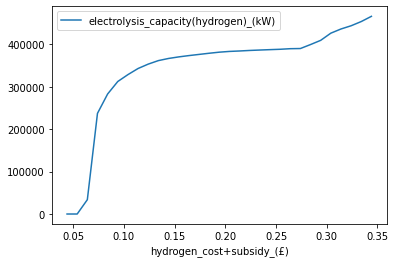

In [273]:
cs1_data.plot(x="hydrogen_cost+subsidy_(£)", y='electrolysis_capacity(hydrogen)_(kW)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

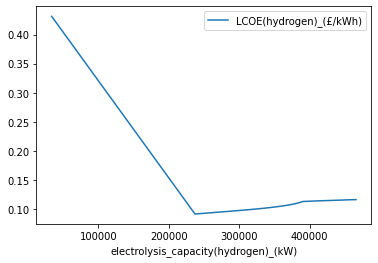

In [274]:
cs1_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='LCOE(hydrogen)_(£/kWh)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

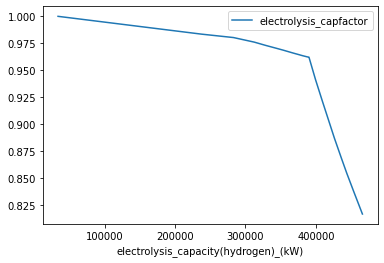

In [275]:
cs1_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='electrolysis_capfactor')

<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

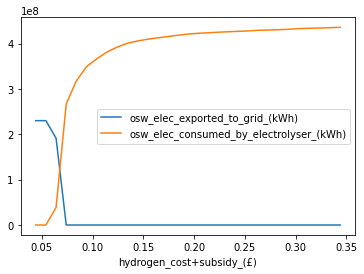

In [276]:
cs1_data.plot(x="hydrogen_cost+subsidy_(£)", y=['osw_elec_exported_to_grid_(kWh)','osw_elec_consumed_by_electrolyser_(kWh)'])

In [277]:
cs2_data = cost_iteration(scenarios[electricity_price][time_period]["cs2"],hydrogen_cost,hydrogen_subsidy)
ws.Beep(3000,10) #to let user know it's finished running

In [278]:
cs2_data

,hydrogen_cost_(£),hydrogen_subsidy_(£),hydrogen_cost+subsidy_(£),electrolysis_capacity(hydrogen)_(kW),osw_capacity_(kW),battery_capactiy_(kW),osw_elec_consumed_by_electrolyser_(kWh),osw_elec_exported_to_grid_(kWh),green_hydrogen_prod_(kWh),alt_hydrogen_prod_(kWh),electrolysis_cost_(£),osw_cost_(£),electrolysis_capfactor,osw_capfactor,total_system_cost_(£),LCOE(hydrogen)_(£/kWh),LCOE(elec)_(£/kWh)
0,0.044,0.00,0.044,110406.99,186922.07,163674.42,1.253773e+08,0,8.149527e+07,6.645421e+08,2199486.2,4343743.1,0.992117,0.930353,6543229.3,0.080290,N/A
1,0.044,0.01,0.054,174033.58,312285.88,261561.48,1.968470e+08,0,1.279505e+08,6.192482e+08,3467030.9,7256979.4,0.988180,0.877947,10724010.3,0.083814,N/A
2,0.044,0.02,0.064,214527.05,404301.07,323859.12,2.420192e+08,0,1.573125e+08,5.906204e+08,4273726.4,9395252.0,0.985617,0.836034,13668978.4,0.086891,N/A
3,0.044,0.03,0.074,275100.79,556456.52,417049.50,3.088302e+08,0,2.007396e+08,5.482789e+08,5480453.6,12931079.0,0.980773,0.778347,18411532.6,0.091718,N/A
4,0.044,0.04,0.084,308453.02,647400.76,468360.62,3.449057e+08,0,2.241887e+08,5.254160e+08,6144883.9,15044465.0,0.976904,0.748542,21189348.9,0.094516,N/A
5,0.044,0.05,0.094,331911.47,715398.13,503523.23,3.694592e+08,0,2.401484e+08,5.098553e+08,6612214.4,16624605.0,0.972489,0.726388,23236819.4,0.096760,N/A
6,0.044,0.06,0.104,347590.13,765393.35,527644.24,3.858129e+08,0,2.507784e+08,4.994911e+08,6924558.6,17786407.0,0.969728,0.709490,24710965.6,0.098537,N/A
7,0.044,0.07,0.114,358038.60,801481.28,543718.80,3.966145e+08,0,2.577994e+08,4.926456e+08,7132709.0,18625028.0,0.967786,0.696825,25757737.0,0.099914,N/A
8,0.044,0.08,0.124,365053.26,827266.78,554510.60,4.038290e+08,0,2.624889e+08,4.880734e+08,7272452.5,19224238.0,0.966455,0.687586,26496690.5,0.100944,N/A
9,0.044,0.09,0.134,370357.63,848258.80,562671.17,4.092794e+08,0,2.660316e+08,4.846192e+08,7378124.1,19712056.0,0.965470,0.679771,27090180.1,0.101831,N/A


<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

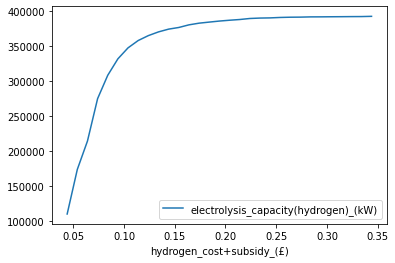

In [279]:
cs2_data.plot(x="hydrogen_cost+subsidy_(£)", y='electrolysis_capacity(hydrogen)_(kW)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

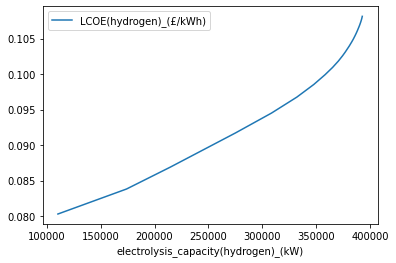

In [280]:
cs2_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='LCOE(hydrogen)_(£/kWh)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

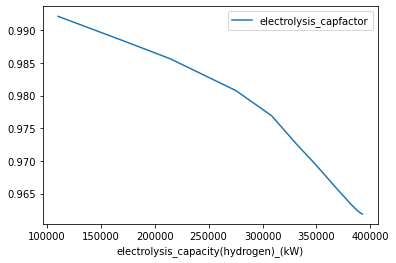

In [281]:
cs2_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='electrolysis_capfactor')

<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

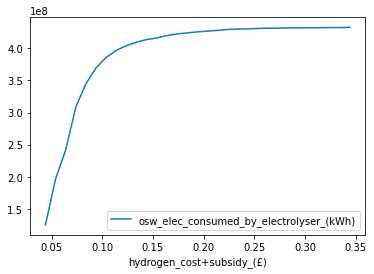

In [282]:
cs2_data.plot(x="hydrogen_cost+subsidy_(£)", y='osw_elec_consumed_by_electrolyser_(kWh)')

In [283]:
cs3_data = cost_iteration(scenarios[electricity_price][time_period]["cs3"],hydrogen_cost,hydrogen_subsidy)
ws.Beep(3000,10) #to let user know it's finished running

In [284]:
cs3_data

,hydrogen_cost_(£),hydrogen_subsidy_(£),hydrogen_cost+subsidy_(£),electrolysis_capacity(hydrogen)_(kW),osw_capacity_(kW),battery_capactiy_(kW),osw_elec_consumed_by_electrolyser_(kWh),osw_elec_exported_to_grid_(kWh),green_hydrogen_prod_(kWh),alt_hydrogen_prod_(kWh),electrolysis_cost_(£),osw_cost_(£),electrolysis_capfactor,osw_capfactor,total_system_cost_(£),LCOE(hydrogen)_(£/kWh),LCOE(elec)_(£/kWh)
0,0.044,0.00,0.044,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
1,0.044,0.01,0.054,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
2,0.044,0.02,0.064,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
3,0.044,0.03,0.074,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
4,0.044,0.04,0.084,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
5,0.044,0.05,0.094,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
6,0.044,0.06,0.104,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
7,0.044,0.07,0.114,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
8,0.044,0.08,0.124,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000
9,0.044,0.09,0.134,0.000,124074.0,0.000,-0.000000e+00,4.519702e+07,0.000000e+00,7.440000e+08,0.0,0.0,NaN,0.502171,0.0,NaN,0.000000


<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

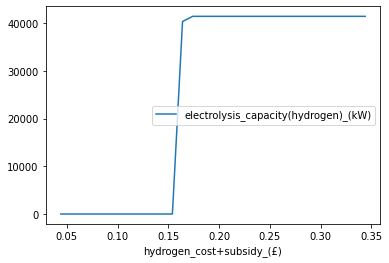

In [285]:
cs3_data.plot(x="hydrogen_cost+subsidy_(£)", y='electrolysis_capacity(hydrogen)_(kW)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

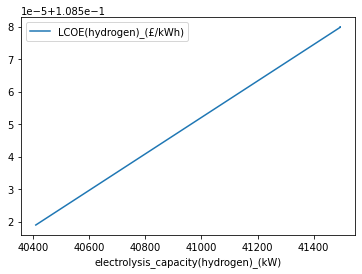

In [286]:
cs3_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='LCOE(hydrogen)_(£/kWh)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

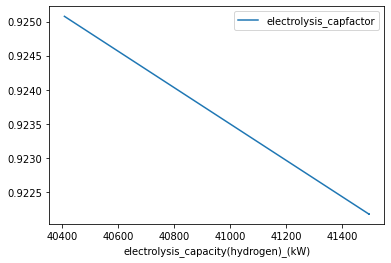

In [287]:
cs3_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='electrolysis_capfactor')

<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

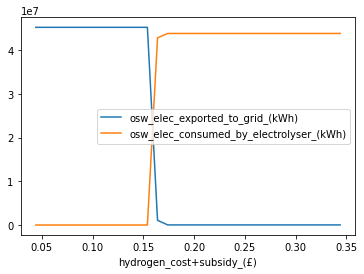

In [288]:
cs3_data.plot(x="hydrogen_cost+subsidy_(£)", y=['osw_elec_exported_to_grid_(kWh)','osw_elec_consumed_by_electrolyser_(kWh)'])

In [289]:
cs4_data = cost_iteration(scenarios[electricity_price][time_period]["cs4"],hydrogen_cost,hydrogen_subsidy)
ws.Beep(3000,10) #to let user know it's finished running

In [290]:
cs4_data

,hydrogen_cost_(£),hydrogen_subsidy_(£),hydrogen_cost+subsidy_(£),electrolysis_capacity(hydrogen)_(kW),osw_capacity_(kW),battery_capactiy_(kW),osw_elec_consumed_by_electrolyser_(kWh),osw_elec_exported_to_grid_(kWh),green_hydrogen_prod_(kWh),alt_hydrogen_prod_(kWh),electrolysis_cost_(£),osw_cost_(£),electrolysis_capfactor,osw_capfactor,total_system_cost_(£),LCOE(hydrogen)_(£/kWh),LCOE(elec)_(£/kWh)
0,0.044,0.00,0.044,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
1,0.044,0.01,0.054,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
2,0.044,0.02,0.064,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
3,0.044,0.03,0.074,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
4,0.044,0.04,0.084,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
5,0.044,0.05,0.094,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
6,0.044,0.06,0.104,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
7,0.044,0.07,0.114,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
8,0.044,0.08,0.124,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A
9,0.044,0.09,0.134,5390.6751,67000.0,57031.654,1.904064e+06,0,1.237642e+06,7.427933e+08,-38872.978,0.0,0.308588,0.042704,-38872.978,-0.031409,N/A


<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

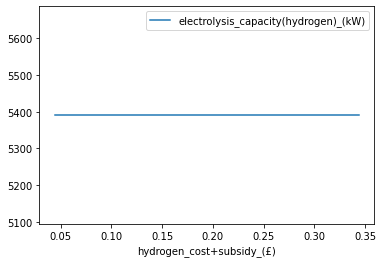

In [291]:
cs4_data.plot(x="hydrogen_cost+subsidy_(£)", y='electrolysis_capacity(hydrogen)_(kW)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

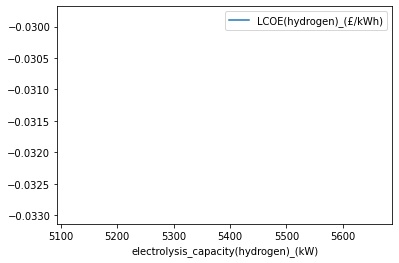

In [292]:
cs4_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='LCOE(hydrogen)_(£/kWh)')

<AxesSubplot:xlabel='electrolysis_capacity(hydrogen)_(kW)'>

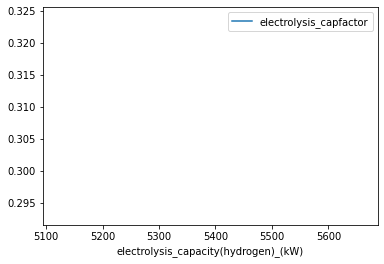

In [293]:
cs4_data.plot(x="electrolysis_capacity(hydrogen)_(kW)", y='electrolysis_capfactor')

<AxesSubplot:xlabel='hydrogen_cost+subsidy_(£)'>

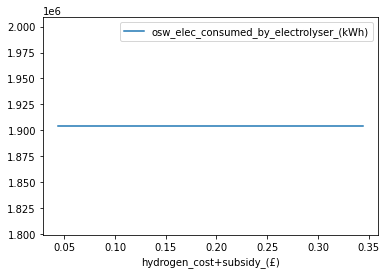

In [294]:
cs4_data.plot(x="hydrogen_cost+subsidy_(£)", y='osw_elec_consumed_by_electrolyser_(kWh)')